In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california = fetch_california_housing()
print(california.data.shape)     # For dataset dimension
print(california.feature_names)    # for feature name
print(california.target)           # for target variable
print(california.DESCR)

(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The

In [4]:
import pandas as pd
import statsmodels.api as sm
cal = pd.DataFrame(california.data, columns = california.feature_names)
cal['price']= california.target
cal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
X = cal.drop("price",axis=1)     # feature matrix
y = cal['price']            # target feature


In [6]:
X


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


## 1. Forward Selection

In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [8]:
import statsmodels.api as sm
def forward_selection(data, target,significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target ,sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column]=model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features      

In [9]:
forward_selection(X,y)

['MedInc',
 'HouseAge',
 'Latitude',
 'Longitude',
 'AveBedrms',
 'AveRooms',
 'AveOccup']

In [10]:
# !pip install mlxtend
### Using built-in library functions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forword Selction(sfs)
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [11]:
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(5, 5),
                          scoring='r2')

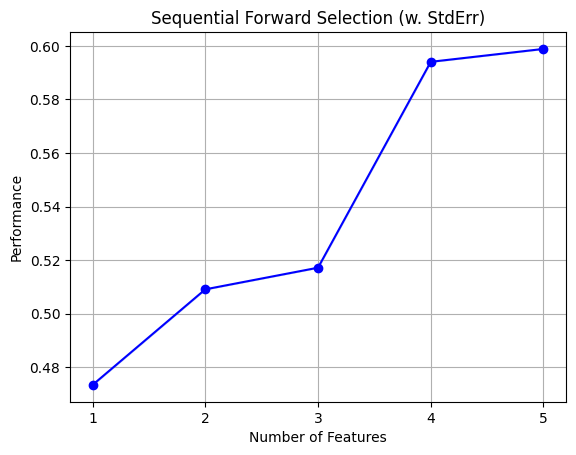

In [12]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [13]:
sbs = SFS(LinearRegression(),
         k_features=(3,8),
         forward = True,
         floating = False,
         cv =0)
sbs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(3, 8),
                          scoring='r2')

## 2. Backward elimination

In [14]:
sbs = SFS(LinearRegression(),
         k_features=(3,8),
         forward = False,
         floating = False,
         cv =0)
sbs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(3, 8), scoring='r2')

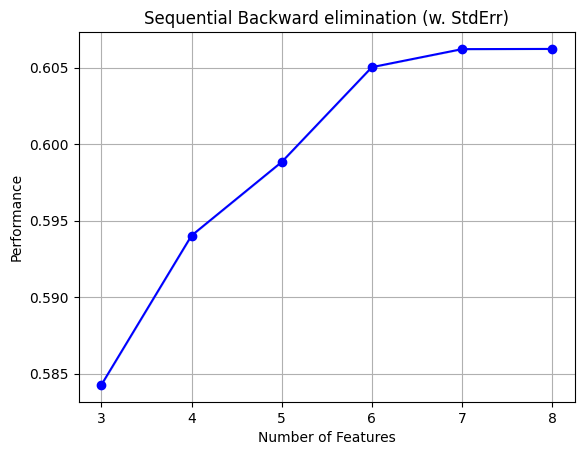

In [15]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward elimination (w. StdErr)')
plt.grid()
plt.show()

In [16]:
sbs = SFS(LinearRegression(),
          k_features=6,
          forward=False,
          floating=False,
#           scoring = 'r2',
          cv = 0)
sbs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(6, 6), scoring='r2')

In [17]:
sbs.k_feature_names_

('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude')